In [1]:
from haliax.dm_models import KineticMixing
from haliax.cosmology import ThermodynamicParticle, sm_sqrt_gstar, sm_entropy_density
from haliax.constants import s_today, rho_crit, plank_mass

import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = KineticMixing(1e2, 1e3, 1.0, 1e-3)

In [6]:
xs=np.logspace(-2,2,100)

tcs = np.array([model.thermal_cross_section(x) for x in xs])

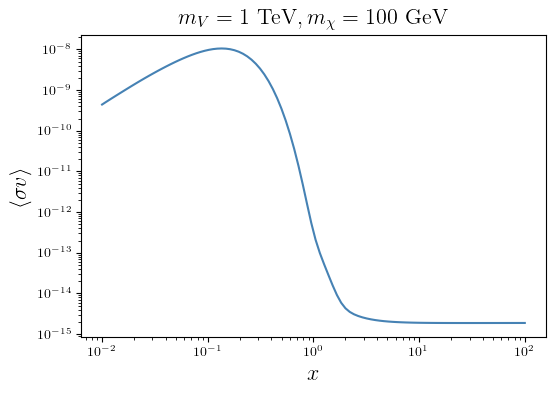

In [11]:
plt.figure(dpi=100)
plt.plot(xs, tcs)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\langle\sigma v\rangle$',fontsize=16)
plt.xlabel(r'$x$',fontsize=16)
plt.title(r'$m_{V}=1\ \mathrm{TeV}, m_{\chi}=100\ \mathrm{GeV}$',fontsize=16)
plt.savefig('vm_tcs.pdf')

In [59]:
mv = 1e3
mxs = np.logspace(1, 5, num=150)

In [60]:
def compute_rd(model, alg):
    try:
        return model.relic_density(alg=alg, reltol=1e-13, abstol=1e-13, xend=50000.0) * rho_crit / s_today / model.mx
    except:
        return np.nan

In [61]:
Y0s_gg = np.array([compute_rd(KineticMixing(mx, mv, 1.0, 1e-3), 'gg') for mx in mxs])

In [62]:
Y0s_mpu = np.array([compute_rd(KineticMixing(mx, mv, 1.0, 1e-3), 'mpu') for mx in mxs])

In [63]:
Y0s_radau = np.array([compute_rd(KineticMixing(mx, mv, 1.0, 1e-3), 'radau') for mx in mxs])

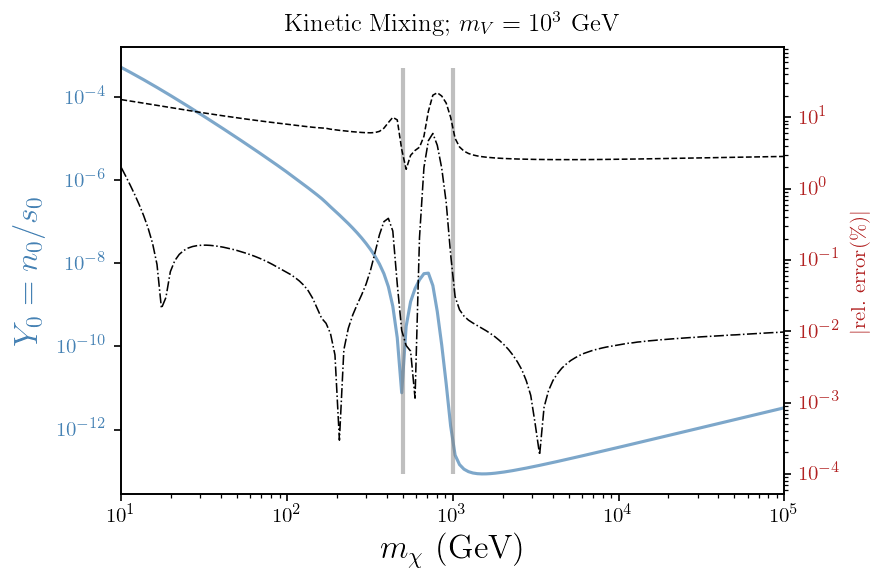

In [97]:
fig, ax1 = plt.subplots()
fig.dpi=150


ax1.set_xlabel(r'$m_{\chi} \ (\mathrm{GeV})$',fontsize=16)
ax1.set_ylabel(r'$Y_{0} = n_0/s_0$', color='steelblue',fontsize=16)
ax1.plot(mxs, Y0s_radau, color='steelblue', label='Radau', alpha=0.7)
#ax1.plot(mxs, Y0s_gg, color='steelblue', ls='--', label='Gondolo-Gelmini')
#ax1.plot(mxs, Y0s_mpu, color='steelblue', ls='-.', label='This work')

ax1.tick_params(axis='y', labelcolor='steelblue')
#ax1.vlines(2*mv, 1e-14,1e-5)
ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.legend(loc=1)
ax1.set_title(r'Kinetic Mixing; $m_{V}=10^{3}\ \mathrm{GeV}$')
ax1.set_xlim([np.min(mxs),np.max(mxs)])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'firebrick'
ax2.set_ylabel(r'$\left|\mathrm{rel. \ error}(\%)\right|$', color=color)  # we already handled the x-label with ax1
ax2.plot(mxs, np.abs(Y0s_gg - Y0s_radau) / Y0s_radau * 100, color='k', ls='--', lw=0.75)
ax2.plot(mxs, np.abs(Y0s_mpu - Y0s_radau) / Y0s_radau * 100, color='k', ls='-.', lw=0.75)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
ax2.vlines(1e3, 1e-4, 5e1, color='gray', lw=2, alpha=0.5)
ax2.vlines(5e2, 1e-4, 5e1, color='gray', lw=2, alpha=0.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('y0_km.pdf')

(-0.001, 0.002)

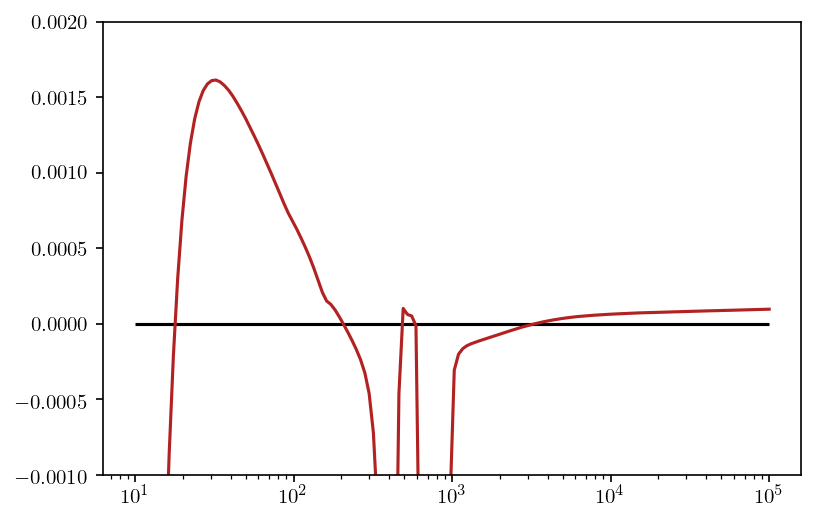

In [81]:
plt.figure(dpi=150)

#plt.plot(mxs, (Y0s_gg - Y0s_radau), color=color, ls='--')
plt.plot(mxs, (Y0s_mpu - Y0s_radau) / Y0s_radau, color=color, ls='-')
plt.hlines(0, np.min(mxs), np.max(mxs))
plt.xscale('log')
plt.ylim([-1e-3,2e-3])

In [98]:
from scipy.integrate import quad

In [12]:
from sympy import *

In [ ]:
Sum(1/n)